## How to Include the Probability of WHITE Results

Possible solutions (may not be trivial...):
- [Compound probability distribution](https://en.wikipedia.org/wiki/Compound_probability_distribution)
- [Beta-binomial](https://en.wikipedia.org/wiki/Beta-binomial_distribution)

In the main notebook I put together a binomial probability formulation for computing the probability distribution for a given color. To this I added the probability of rolling a "wild" BLACK result.

The next step is to add WHITE results, but this seems pretty tricky, and I have not had time to figure out the mathematical formulation for this.

It's tricky because WHITE results are *not* independent of YELLOW and BLACK results. They can only be counted in cases where one of the others is already present. In the simulation I accounted for this by clipping the number of WHITE results based on the number of hits after adding BLACK results.

If I have time I'll revisit this.

### First Attempts

Let's think this through case by case...

When $k=0$, there is still only one way to arrive at this, because any combination of non-yellow and non-black dice will result in 0 hits, even if some of those are white.

In the case of $k=1$, there are still only ten ways this can happen, because there are only ten combinations of yellow or black dice. White cannot count in this case.

Things get interesting in the case of $k=2$ and above. Here the combinations computed by the binomial coefficient will need to be altered. The number of valid combinations for each value $k$ should increase, I think.

We can simplify this by looking at valid combinations where $n=2$ where WHITE results can count.

When $k=0$, there is only one valid permutation out of nine total:

```text
(MISS,   MISS)  VALID
(MISS,   YB)
(MISS,   WHITE)
(YB,     MISS)
(YB,     YB)
(YB,     WHITE)
(WHITE,  MISS)
(WHITE,  YB)
(WHITE,  WHITE)
```

When $k=1$ there are two out of nine:

```text
(MISS,   MISS)
(MISS,   YB)     VALID
(MISS,   WHITE)
(YB,     MISS)   VALID
(YB,     YB)
(YB,     WHITE)
(WHITE,  MISS)
(WHITE,  YB)
(WHITE,  WHITE)
```

When $k=2$ there is again one if we don't count whites.

```text
(MISS,   MISS)
(MISS,   YB)
(MISS,   WHITE)
(YB,     MISS)
(YB,     YB)     VALID
(YB,     WHITE)
(WHITE,  MISS)
(WHITE,  YB)
(WHITE,  WHITE)
```

But if we can count white, then the possible permutations increases to three:

```text
(MISS,   MISS)
(MISS,   YB)
(MISS,   WHITE)
(YB,     MISS)
(YB,     YB)     VALID
(YB,     WHITE)  VALID
(WHITE,  MISS)
(WHITE,  YB)     VALID
(WHITE,  WHITE)
```

Note that this doesn't affect any other case, because WHITE can only count in combination with a YELLOW or BLACK.

So let's start by seeing how we can model the total possible permutations. It's pretty clear that this is $3^2$ - three options to the power of two rolls.

In [1]:
pow(3,2)

9

So for ten rolls, we would expect this total for possible permutations:

In [2]:
pow(3, 10)

59049

Yeah, no way I'm going to list all those cases out by hand.

In [3]:
import math

n = 10
yb_prob = 5/12
wh_prob = 1/12

In [4]:
def bprob(n, k, p):
    return math.comb(n, k) * pow(p, k) * pow(1 - p, n - k)

k=2 Unique cases:
- 8 are MISS, 2 are YELLOW
- 8 are MISS, 1 is YELLOW, 1 is BLACK
- 8 are MISS, 1 is YELLOW, 1 is WHITE

In [5]:
distro = []

In [6]:
# k = 0
distro.append((
    0,
    bprob(10, 0, yb_prob)
))

In [7]:
# k = 1
distro.append((
    1,
    bprob(10, 1, yb_prob)
))

In [8]:
# k = 2
distro.append((
    2,
    (     bprob(10, 2, yb_prob)
     
        + bprob(10, 1, yb_prob)
        + bprob( 9, 1, wh_prob)
    ) / 3
))
# bprob( 9, 1, wh_prob)
# bprob(10, 1, yb_prob)
# bprob(10, 2, yb_prob)

distro

[(0, 0.004562132974169925), (1, 0.03258666410121376), (2, 0.17040906601732964)]

In [9]:
# k = 2
distro.append((
    3,
    (     bprob(10, 3, yb_prob)

        + bprob( 8, 2, yb_prob)
        + bprob( 9, 1, wh_prob)) / 3
))

In [10]:
# k = 4
distro.append((
    4,
    (     bprob(10, 4, yb_prob)
    
        + bprob(10, 3, yb_prob)
        + bprob( 7, 1, wh_prob)

        + bprob(10, 2, yb_prob)
        + bprob( 8, 2, wh_prob)) / 5
))

In [11]:
# k = 5
distro.append((
    5,
    (     bprob(10, 5, yb_prob)
    
        + bprob(10, 4, yb_prob)
        + bprob( 6, 1, wh_prob)

        + bprob(10, 3, yb_prob)
        + bprob( 7, 2, wh_prob)) / 5
))

In [12]:
# k = 6
distro.append((
    6,
    (   bprob(10, 6, yb_prob)
    
      + bprob(10, 5, yb_prob)
      + bprob( 5, 1, wh_prob)

      + bprob(10, 4, yb_prob)
      + bprob( 6, 2, wh_prob)

      + bprob(10, 3, yb_prob)
      + bprob( 7, 3, wh_prob)) / 7
))

In [13]:
# k = 7
distro.append((
    7,
    (     bprob(10, 7, yb_prob)
     
        + bprob(10, 6, yb_prob)
        + bprob( 4, 1, wh_prob)

        + bprob(10, 5, yb_prob)
        + bprob( 5, 2, wh_prob)

        + bprob(10, 4, yb_prob)
        + bprob( 6, 3, wh_prob)) / 7
))

In [14]:
# k = 8
distro.append((
    8,
    (     bprob(10, 8, yb_prob)
     
        + bprob(10, 7, yb_prob)
        + bprob( 3, 1, wh_prob)

        + bprob(10, 6, yb_prob)
        + bprob( 4, 2, wh_prob)

        + bprob(10, 5, yb_prob)
        + bprob( 5, 3, wh_prob)) / 7
))

In [15]:
# k = 9
distro.append((
    9,
    (     bprob(10, 9, yb_prob)
     
        + bprob(10, 8, yb_prob)
        + bprob( 2, 1, wh_prob)

        + bprob(10, 7, yb_prob)
        + bprob( 3, 2, wh_prob)

        + bprob(10, 6, yb_prob)
        + bprob( 4, 3, wh_prob)
        
        + bprob(10, 5, yb_prob)
        + bprob( 5, 4, wh_prob)) / 9
))

In [16]:
# k = 10
distro.append((
    10,
    (     bprob(10, 10, yb_prob)
     
        + bprob(10, 9, yb_prob)
        + bprob( 1, 1, wh_prob)

        + bprob(10, 8, yb_prob)
        + bprob( 2, 2, wh_prob)

        + bprob(10, 7, yb_prob)
        + bprob( 3, 3, wh_prob)
        
        + bprob(10, 6, yb_prob)
        + bprob( 4, 4, wh_prob)
        
        + bprob(10, 5, yb_prob)
        + bprob( 5, 5, wh_prob)) / 11
))

<BarContainer object of 11 artists>

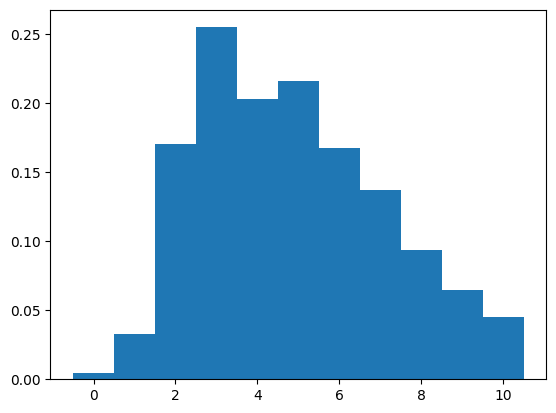

In [17]:
import matplotlib.pyplot as plt

plt.clf()
x_values, y_values = zip(*distro)

plt.title("")
plt.bar(x_values, y_values, align='center', width=1)

In [18]:
sum(y_values)

1.3905615247155172

The above approach cannot be correct, because I am averaging the probability of scoring a particular hit count across an entire distribution.

So for example at k=2, the probability of rolling just 1 white in 10 is higher than the probability of rolling just 1 yellow in 10, because the probability of rolling a white is LOWER than the probability of rolling a yellow. So doing it this way disproportionately increases the probability at k=2.

This indicates that I need to incorporate the probability of rolling a white at a "lower level" of the computation. The effect it should have is to increase the probability of higher hit counts and reduce the probability of lower hit counts.

I have spiraled around this issue for a while now, and I keep returning to the conclusion that simulation is the easiest way to solve this problem, especially since we have computers to run all the calculations for us! I am still attracted by the idea of developing a formal solution, though.

In [19]:
distro = [
    ( 0, math.comb(10,  0) * pow(yb_prob,  0) * pow(1 - yb_prob,  10 - 0)),
    ( 1, math.comb(10,  1) * pow(yb_prob,  1) * pow(1 - yb_prob,  10 - 1)),
    ( 2, 
            ((math.comb(10,  2) * pow(yb_prob,  3) * pow(1 - yb_prob,  10 - 2))
          + ((math.comb(10, 1) * pow(yb_prob,  1) * math.comb(9, 1) * pow(wh_prob,  1)) * pow(1 - yb_prob - wh_prob,  10 - 2))) /2
    ),
    ( 3, 
            ((math.comb(10, 2) * pow(yb_prob,  2) * math.comb(10, 1) * pow(wh_prob,  1)) * pow(1 - yb_prob - wh_prob,  10 - 3))
    ),
    ( 4, math.comb(10,  3) * (pow(yb_prob,  3) * math.comb(10, 1) * pow(wh_prob,  1)) * pow(1 - yb_prob - wh_prob,  10 - 4)),
    ( 5, math.comb(10,  4) * (pow(yb_prob,  4) * math.comb(10 ,1) * pow(wh_prob,  1)) * pow(1 - yb_prob - wh_prob,  10 - 5)),
    ( 6, math.comb(10,  6) * (pow(yb_prob,  6) + pow(wh_prob,  6)) * pow(1 - yb_prob - wh_prob,  10 - 6)),
    ( 7, math.comb(10,  7) * (pow(yb_prob,  7) + pow(wh_prob,  7)) * pow(1 - yb_prob - wh_prob,  10 - 7)),
    ( 8, math.comb(10,  8) * (pow(yb_prob,  8) + pow(wh_prob,  8)) * pow(1 - yb_prob - wh_prob,  10 - 8)),
    ( 9, math.comb(10,  9) * (pow(yb_prob,  9) + pow(wh_prob,  9)) * pow(1 - yb_prob - wh_prob,  10 - 9)),
    (10, math.comb(10, 10) * (pow(yb_prob, 10) + pow(wh_prob, 10)) * pow(1 - yb_prob - wh_prob, 10 - 10)),
]
distro

[(0, 0.004562132974169925),
 (1, 0.03258666410121376),
 (2, 0.02792494247849136),
 (3, 0.0508626302083333),
 (4, 0.11302806712962958),
 (5, 0.16483259789737648),
 (6, 0.06868464465985082),
 (7, 0.032705299157664604),
 (8, 0.01022030133115248),
 (9, 0.0018926445185238774),
 (10, 0.00015772031194142332)]

In [20]:
# Binomial Coefficient for 4 choose 2
# (Y, Y, M, M)
# (M, Y, Y, M)
# (M, M, Y, Y)
# (Y, M, Y, M)
# (M, Y, M, Y)
# (Y, M, M, Y)
math.comb(4, 2)

6

In [21]:
# Binomial Coefficient for 4 choose 2
# (Y, W, M, M)
# (M, Y, W, M)
# (M, M, Y, W)
# (W, Y, M, M)
# (M, W, Y, M)
# (M, M, W, Y)
# (Y, M, W, M)
# (M, Y, M, W)
# (W, M, Y, M)
# (M, W, M, Y)
# (Y, M, M, W)
# (W, M, M, Y)
math.comb(4, 2) + math.comb(4, 2)

12

In [22]:
# Compute the number of valid permutations at k out of all possible permutations
# x is the number of possible choices, in this case 3 (Y, W, M)
def f(n, k, x):
    return x * (math.comb(n, k)) / math.pow(n, x)

In [23]:
distro = [(k, f(10, k, 3)) for k in range(11)]
distro

[(0, 0.003),
 (1, 0.03),
 (2, 0.135),
 (3, 0.36),
 (4, 0.63),
 (5, 0.756),
 (6, 0.63),
 (7, 0.36),
 (8, 0.135),
 (9, 0.03),
 (10, 0.003)]

This looks like the correct distribution. It needs to be normalized to sum to 1 to be a proper probability distribution.

In [24]:
distro_normalized = [(k, p / sum([p for k, p in distro])) for k, p in distro]
distro_normalized

[(0, 0.0009765625000000002),
 (1, 0.009765625),
 (2, 0.04394531250000001),
 (3, 0.11718750000000001),
 (4, 0.20507812500000003),
 (5, 0.24609375000000003),
 (6, 0.20507812500000003),
 (7, 0.11718750000000001),
 (8, 0.04394531250000001),
 (9, 0.009765625),
 (10, 0.0009765625000000002)]

<BarContainer object of 11 artists>

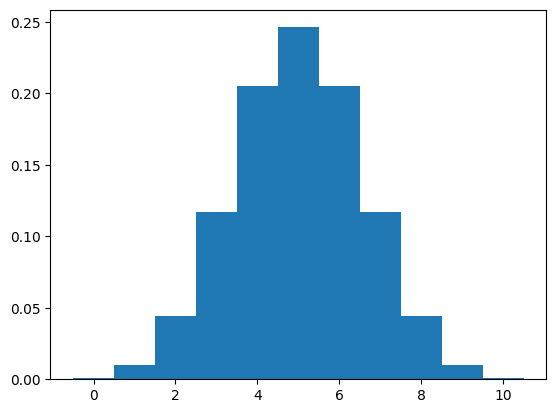

In [25]:
plt.clf()
x_values, y_values = zip(*distro_normalized)

plt.title("")
plt.bar(x_values, y_values, align='center', width=1)

This almost exactly matches what we observed for yellow + wild results in the simulation. But what bugs me is that we never incorporated the probabilities for dice results, so this must be an idealized binomial distribution that just so happens to match up. It still feels like I've discovered a useful formulation here, though. Still need to figure out how to incorporate probabilities...

In [26]:
def f(n, k):
    yb = (math.comb(n, k)) * yb_prob / math.pow(n, 3)
    wh = 2 * (math.comb(n, k)) * wh_prob / math.pow(n, 3)
    return (yb + wh) 

In [27]:
distro = [(k, f(10, k)) for k in range(11)]
distro, sum([p for k, p in distro])

([(0, 0.0005833333333333334),
  (1, 0.005833333333333333),
  (2, 0.02625),
  (3, 0.07),
  (4, 0.1225),
  (5, 0.147),
  (6, 0.1225),
  (7, 0.07),
  (8, 0.02625),
  (9, 0.005833333333333333),
  (10, 0.0005833333333333334)],
 0.5973333333333334)

In [28]:
distro_normalized = [(k, p / sum([p for k, p in distro])) for k, p in distro]
distro_normalized

[(0, 0.0009765625),
 (1, 0.009765624999999998),
 (2, 0.04394531249999999),
 (3, 0.1171875),
 (4, 0.20507812499999997),
 (5, 0.24609374999999997),
 (6, 0.20507812499999997),
 (7, 0.1171875),
 (8, 0.04394531249999999),
 (9, 0.009765624999999998),
 (10, 0.0009765625)]

<BarContainer object of 11 artists>

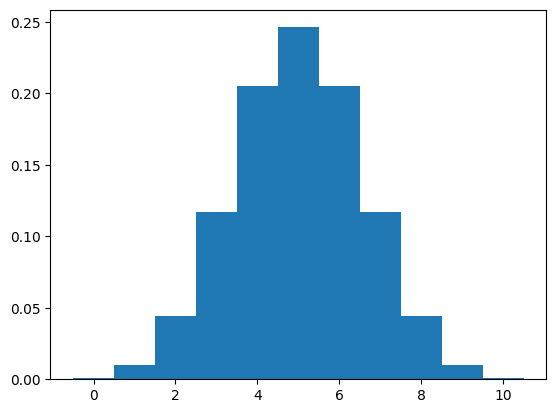

In [29]:
plt.clf()
x_values, y_values = zip(*distro_normalized)

plt.title("")
plt.bar(x_values, y_values, align='center', width=1)

## Multinomial Distribution is the Solution!

In [30]:
def multinomial(n, cb, cb_prob, wh, wh_prob=1/12):
    n_fact = math.factorial(n)
    denom = math.factorial(cb) * math.factorial(wh) * math.factorial(n - cb - wh)
    return (n_fact / denom) * math.pow(cb_prob, cb) * math.pow(wh_prob, wh) * math.pow(1 - cb_prob - wh_prob, n - cb - wh)

In [31]:
def multinomial_distro(cb_prob):
    return [
        (0, multinomial(10, 0, cb_prob, 0) + multinomial(10, 0, cb_prob, 1) + multinomial(10, 0, cb_prob, 2) + multinomial(10, 0, cb_prob, 3) + multinomial(10, 0, cb_prob, 4) + multinomial(10, 0, cb_prob, 5) + multinomial(10, 0, cb_prob, 6) + multinomial(10, 0, cb_prob, 7) + multinomial(10, 0, cb_prob, 8) + multinomial(10, 0, cb_prob, 9) + multinomial(10, 0, cb_prob, 10)),
        (1, multinomial(10, 1, cb_prob, 0)),
        (2, multinomial(10, 2, cb_prob, 0) + multinomial(10, 1, cb_prob, 1) + multinomial(10, 1, cb_prob, 2) + multinomial(10, 1, cb_prob, 3) + multinomial(10, 1, cb_prob, 4) + multinomial(10, 1, cb_prob, 5) + multinomial(10, 1, cb_prob, 6) + multinomial(10, 1, cb_prob, 7) + multinomial(10, 1, cb_prob, 8) + multinomial(10, 1, cb_prob, 9)),
        (3, multinomial(10, 3, cb_prob, 0) + multinomial(10, 2, cb_prob, 1)),
        (4, multinomial(10, 4, cb_prob, 0) + multinomial(10, 3, cb_prob, 1) + multinomial(10, 2, cb_prob, 2) + multinomial(10, 2, cb_prob, 3) + multinomial(10, 2, cb_prob, 4) + multinomial(10, 2, cb_prob, 5) + multinomial(10, 2, cb_prob, 6) + multinomial(10, 2, cb_prob, 7) + multinomial(10, 2, cb_prob, 8)),
        (5, multinomial(10, 5, cb_prob, 0) + multinomial(10, 4, cb_prob, 1) + multinomial(10, 3, cb_prob, 2)),
        (6, multinomial(10, 6, cb_prob, 0) + multinomial(10, 5, cb_prob, 1) + multinomial(10, 4, cb_prob, 2) + multinomial(10, 3, cb_prob, 3) + multinomial(10, 3, cb_prob, 4) + multinomial(10, 3, cb_prob, 5) + multinomial(10, 3, cb_prob, 6) + multinomial(10, 3, cb_prob, 7)),
        (7, multinomial(10, 7, cb_prob, 0) + multinomial(10, 6, cb_prob, 1) + multinomial(10, 5, cb_prob, 2) + multinomial(10, 4, cb_prob, 3)),
        (8, multinomial(10, 8, cb_prob, 0) + multinomial(10, 7, cb_prob, 1) + multinomial(10, 6, cb_prob, 2) + multinomial(10, 5, cb_prob, 3) + multinomial(10, 4, cb_prob, 4) + multinomial(10, 4, cb_prob, 5) + multinomial(10, 4, cb_prob, 6)),
        (9, multinomial(10, 9, cb_prob, 0) + multinomial(10, 8, cb_prob, 1) + multinomial(10, 7, cb_prob, 2) + multinomial(10, 6, cb_prob, 3) + multinomial(10, 5, cb_prob, 4)),
        (10, multinomial(10, 10, cb_prob, 0) + multinomial(10, 9, cb_prob, 1) + multinomial(10, 8, cb_prob, 2) + multinomial(10, 7, cb_prob, 3) + multinomial(10, 6, cb_prob, 4) + multinomial(10, 5, cb_prob, 5)),
    ]

multi_distro = multinomial_distro(2/12)
multi_distro

[(0, 0.16150558288984573),
 (1, 0.12514114379882812),
 (2, 0.32301116577969147),
 (3, 0.18539428710937497),
 (4, 0.14084966712164415),
 (5, 0.046142578124999986),
 (6, 0.015020538610710218),
 (7, 0.0025544343171296285),
 (8, 0.0003552554323924832),
 (9, 2.4466157740816935e-05),
 (10, 8.806576423817502e-07)]

In [32]:
sum([p for k, p in multi_distro])

0.9999999999999999

<BarContainer object of 11 artists>

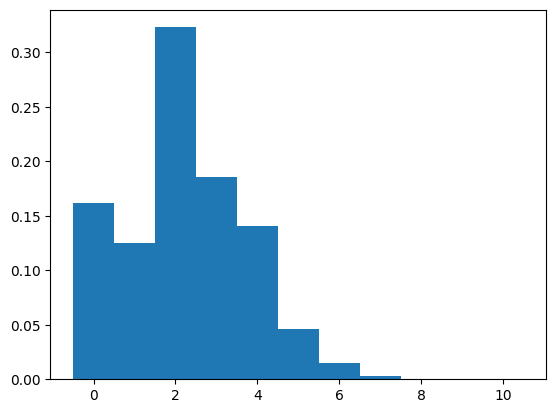

In [33]:
plt.clf()
x_values, y_values = zip(*multi_distro)

plt.title("")
plt.bar(x_values, y_values, align='center', width=1)

## How to generalize this as a formula?

The best idea I have is to compute a matrix that represents the results of each combination of colored plus white dice rolls...

In [34]:
import pandas as pd

n = 4
c = [i for i in range(n + 1)]
w = [i for i in range(n + 1)]

data = [[-1 if c_val + w_val > n else c_val + min(w_val, c_val) for w_val in w] for c_val in c]

# Create a DataFrame from the list of lists
df = pd.DataFrame(data, index=c, columns=w)

# Display the DataFrame
print(df)

   0  1  2  3  4
0  0  0  0  0  0
1  1  2  2  2 -1
2  2  3  4 -1 -1
3  3  4 -1 -1 -1
4  4 -1 -1 -1 -1


/var/folders/kh/66486p_9469202_9rm3n31_h0000gn/T/ipykernel_89645/2639250043.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Now that we have this matrix, we can iterate $k={0...10}$ and find the matching coordinate pairs for each value. Then we can compute and sum the multinomial probability of each.

Here's an example finding all matching pairs for $k=8$:

In [35]:
value_to_find = 8

# Use the `stack` method to convert the DataFrame to a Series and then use `loc` to find the indices
indices = df.stack().loc[df.stack() == value_to_find].index

# Display the result
print("Matching coordinates for value", value_to_find, ":")
for index in indices:
    print(index)


Matching coordinates for value 8 :


In [36]:
n = 10
yb_prob = 5/12

result = []
for k in range(11):
    matched = df.stack().loc[df.stack() == k].index
    result.append((k, sum([multinomial(n, y, yb_prob, w) for y, w in matched])))

result

[(0, 0.004525643807870366),
 (1, 0.008138020833333325),
 (2, 0.054027416087962916),
 (3, 0.10850694444444436),
 (4, 0.20175509982638878),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0)]

Putting that all together into a callable function...

In [37]:
def make_lookup(n):
    c = [i for i in range(n + 1)]
    w = [i for i in range(n + 1)]
    lookup = [[-1 if c_val + w_val > n else c_val + min(w_val, c_val) for w_val in w] for c_val in c]
    return pd.DataFrame(lookup, index=c, columns=w)

make_lookup(4)

,0,1,2,3,4
0,0,0,0,0,0
1,1,2,2,2,-1
2,2,3,4,-1,-1
3,3,4,-1,-1,-1
4,4,-1,-1,-1,-1


In [38]:
def compute_multinomial_distribution(n, c_prob, w_prob):
    df_lookup = make_lookup(n)

    result = []
    for k in range(11):
        matched = df_lookup.stack().loc[df_lookup.stack() == k].index
        result.append((k, sum([multinomial(n, y, c_prob, w, w_prob) for y, w in matched])))
    return result

<BarContainer object of 11 artists>

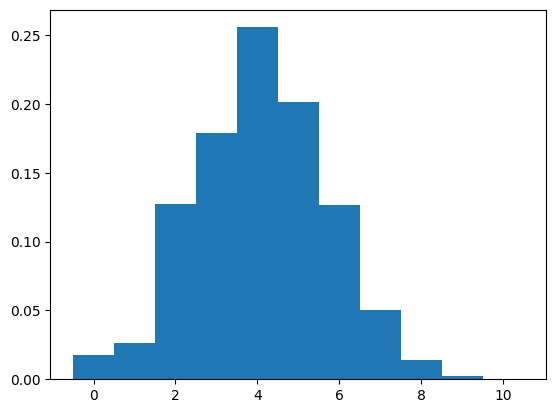

In [39]:
n = 10
c_prob = 4/12
w_prob = 1/12

multi_distro = compute_multinomial_distribution(n, c_prob, w_prob)

plt.clf()
x_values, y_values = zip(*multi_distro)
plt.title("")
plt.bar(x_values, y_values, align='center', width=1)

I thought of another possible way to do the multinomial such that we don't need a lookup. We could take the min of cb, wb, denoted $cb\vee wh$. In addition, we can loop over all combos instead of using a lookup table...

In [40]:
n = 10
c_prob = 5/12
w_prob = 1/12

results = {}
for y in range(n+1):
    for w in range(n+1):
        if y + w > 10: continue
        k = y + min(y, w)
        if k not in results:
            results[k] = 0
        results[k] += multinomial(n, y, c_prob, w, w_prob)

results

{0: 0.004562132974169927,
 1: 0.008138020833333325,
 2: 0.05496622139288042,
 3: 0.10850694444444436,
 4: 0.2115543723342585,
 5: 0.23735894097222215,
 6: 0.20531857515782867,
 7: 0.11512117948388202,
 8: 0.04382120886451253,
 9: 0.009678222054674005,
 10: 0.0009741814877936884}

In [41]:
sum([p for k, p in results.items()])

0.9999999999999998

In [46]:
def multi_by_k(k, n, c_prob, w_prob):
    return sum([multinomial(n, c, c_prob, w, w_prob) for c in range(n + 1) for w in range(n + 1) if c + w <= n and c + min(c, w) == k])

multi_by_k(5, 10, 5/12, 1/12)

0.23735894097222215

Now if we want to get the probability of $Z$ for a given number of hits $k$, we can use the following formula:

$$
P(Z = k) = \sum_{{c=0}}^{n+1} \sum_{{w=0}}^{n+1} \frac{n!}{c!w!} \cdot {p_c}^c {p_w}^w \cdot [c + c \vee w) = k] \cdot [c + w < n]
$$

where:
- $n$ represents the total number of trials
- $c$ represents the number of colored outcomes
- $p_c$ represents the probability of a colored outcome
- $w$ represents the number of white outcomes
- $p_w$ represents the probability of a white outcome
- $k$ represents the desired value of the sum of colored and minimum of colored and white outcomes and $0 \leq k \leq n$
- $\vee$ represents the min function